
請解釋專案中的 MLP 為何？通常CNN用來處理圖片，請詳細解釋在這邊想要使用CNN的原因。

MLP，Multi-layer Perceptron，是全連結神經網路，一般在CNN後面會接上MLP作為分類器。在專案中的原始輸入資料為8項獨立的數值，並沒有空間上的關聯性或特徵，故最原始的想法為使用MLP即可進行快速簡單的分類。後來想將專案內容與上課所學做連結，發想將資料特徵轉為圖片的形式，再以CNN進行訓練與學習，但是過程中有技術上的失誤，導致專案最終的進行僅為兩種不同權重的MLP在進行訓練，造成此誤會以及專案的不完整，致上萬分歉意。


###**計算機程式期末-音樂分析**
---
一、介紹：
*   組員與分工介紹
*   題目動機與內容
*   進行的流程介紹

二、實際進行：
1.   資料來源
2.   讀入相關套件
1.   讀入資料集&整理成訓練和測試資料
2.   建立模型並訓練
1.   資料視覺化
2.   結語
---


####一、
#### 組員/分工：
1.   統計二 107304018 林盈盈 / 資料處理、簡報設計
2.   統計二 107304025 王嬿筑 / 視覺處理
3.   資管二 107306033 楊如瀅 / 資料處理、建立模型
4.   資管二 107306079 邱聖雅 / 資料處理、建立模型

#### 題目發想：

平常上學或是上班時，讓人最痛苦也最重要的莫過於努力把自己從睡夢中叫醒。然而常常很多人睡太好，處在一個很深眠的狀況，導致忽視或沒有聽到自己的鬧鐘的慘劇層出不窮。因此我們想到，若可以依照在要醒來的前一刻身體的睡眠週期來判斷叫醒一個人需要的鈴聲強度，應該可以有效率的解決很多人睡過頭的問題。

例如在睡眠週期第一階段的人可以提供較緩和的鈴聲，因為這樣能叫醒該使用者又不會對耳朵造成太大的負擔。而在睡眠週期第三階段，睡得比較沉穩的人，則可以使用讓人較不放鬆的鈴聲，成功達到鈴聲的功用。

整個主題可以分為兩個部分，首先是得知使用者的睡眠現況，例如他現在是屬於睡眠的哪個階段（包括第一、二、三階段與快速眼動睡眠期，而以每個晚上以一個睡8小時的成年人來說，會經歷4﹣6次的階段循環），再來是根據睡眠的階段推薦最有效率喚醒睡眠者的鬧鐘聲音，我們在專題內將進行辨識鬧鐘聲音的訓練。

所以輸入一首歌，訓練好的模型會輸出該首歌曲是否為助眠音樂，達到反指標的效應，深眠的人需要的就是最不助眠的音樂。

#### 流程介紹：
1資料搜集→2資料整理→3模型訓練→4結果


1.   spotify上有數量龐大、依照音樂特性分類的playlist，其中分類包含助眠、派對等等，而spotify也開放開發者從官方的web api抓取所需的音樂相關資料，例如一個創作者所有的歌曲、一個歌曲的某些特徵數值等等。故資料搜集為透過spotify web api抓取主題相關歌曲數值。
2.   抓取的主題相關歌曲包含助眠、放鬆、派對、運動等，並且逐一加上label，共有15,000筆。
1.   輸入的資料型態為多項特徵值與對應標籤，我們以CNN和MLP兩種不同學習模式進行訓練。
2.   結果

---

#### 二、
#### 1. 資料來源
*   https://developer.spotify.com/documentation/web-api/ 是spotify官方提供給開發者取用資料的平台，而我們透過python library 中的spotipy(https://spotipy.readthedocs.io/en/2.12.0/ )抓取資料並存取為csv檔作為後續使用。
*   每一首歌會有20個attributes，我們去除id, artist, url等和音樂性質較不相關的特性，擷取其中的tempo	, liveness,	instrumentalness,	acousticness,	speechiness,	loudness,	energy,	danceability，共8項作為分析一首歌的主要項目。首先透過特定主題playlist獲得其中每首歌的id，後透過id獲得該首歌曲的attributes。

*   我們抓取眾多已由spotify分類好的playlist為訓練和測試資料，分為助眠和不助眠的音樂，資料數為15,000筆左右。
*   將以下抓取資料用code註解起來的原因是colab上無法使用spotipy中spotify帳號授權過程的彈出視窗，故以sublime和terminal執行。





In [0]:
'''
#取得spotify上歌曲資料的相關套件
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
import sys
from spotipy.oauth2 import SpotifyClientCredentials

# account information
user_id = 'q5wi1zj0t7tuwnx1j52u7sat5' #Spotify上帳號的ID
#Spotify  for Development的ID
client_id = 'c391b08e6b2e4ddf9bb1b6deca0ee2dc' 
client_secret = 'd6e1596ce9ec4ce1bcc02db48639a24e'
# authorization


token = util.prompt_for_user_token(user_id,
                                   'playlist-read-collaborative',
                                   client_id=client_id,
                                   client_secret=client_secret,
                                   redirect_uri='http://127.0.0.1:1222'

                                   )
sp = spotipy.Spotify(auth=token)


# getting tracks in a playlist
playlist = sp.user_playlist(user_id, '37i9dQZF1DWTIcwQEMKk2L') # 要爬曲歌單的playlist ID
# 將playlist中每一首歌的資料(id,artist,name)解析出來
tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
# 將playlist中所有歌曲的features分析出來
features = []
for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
    features += sp.audio_features([*map(str, chunk_series)])
features_df = pd.DataFrame.from_dict(filter(None, features))
tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
'''
# try getting many playlists at once 
'''
# sleep playlist 2992
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepPlaylist = ['37i9dQZF1DWTIcwQEMKk2L', '37i9dQZF1DWTlKxC5XMcbx', '37i9dQZF1DWZd79rJ6a7lp', 
'37i9dQZF1DX4sWSpwq3LiO', '37i9dQZF1DX0DxcHtn4Hwo', '37i9dQZF1DWVsXD88oyxvI', '37i9dQZF1DWX5zQ3IhNyvj',
'37i9dQZF1DX03b46zi3S82', '37i9dQZF1DX42o4SsMqqwn', '37i9dQZF1DX6mXxqnWLIPb', '37i9dQZF1DXcCnTAt8CfNe',
'37i9dQZF1DXbADqT0j1Cxt', '37i9dQZF1DXa1rZf8gLhyz', '37i9dQZF1DX8Sz1gsYZdwj', '37i9dQZF1DWV5BKo4w4oDg',
'37i9dQZF1DXbcPC6Vvqudd', '37i9dQZF1DXdJ5OFSzWeCS', '37i9dQZF1DWT0G9IZIf2WF', '37i9dQZF1DX8skPjZYk8mL', 
'37i9dQZF1DWUAeTOoyNaqm', '37i9dQZF1DX9if5QDLdzCa', '37i9dQZF1DXdbkmlag2h7b', '37i9dQZF1DWUKPeBypcpcP', 
'37i9dQZF1DX1n9whBbBKoL', '37i9dQZF1DWSiZVO2J6WeI', '37i9dQZF1DWXVDbSwjxsVN', '37i9dQZF1DXabJG3i5q2yk', 
'37i9dQZF1DX8gJ2FqE753V', '37i9dQZF1DWXzR2GKEiHgT', '37i9dQZF1DWXIrropGBmnR', '37i9dQZF1DWXjlftzHjTQ5', 
'37i9dQZF1DWVEt8B7a1H1M', '37i9dQZF1DX2mFmJUZg4Mp', '37i9dQZF1DX2y5WZJJL4SF', '37i9dQZF1DX4aYNO8X5RpR', 
'37i9dQZF1DWZhzMp90Opmn', '37i9dQZF1DWWtqHeytOZ8f', '37i9dQZF1DXbZmKskFbVct', '37i9dQZF1DX9QSrZ8cQbyd', 
'37i9dQZF1DX3WdioUzkg8I', '37i9dQZF1DWWSads6V2oIk', '37i9dQZF1DX8h3zQNo57xG', '37i9dQZF1DX0gdPaTnsXKL', 
'37i9dQZF1DX9NmDLwNQnXE', '37i9dQZF1DXb6LkIGouseT', '37i9dQZF1DX0ES2mnOVvai', '37i9dQZF1DWTSIF6WEosDG']


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./sleep2992.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)

'''

# party playlist 2175
'''
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepㄏ


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./party2175.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)
'''

# workout playlist 2175
'''
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepPlaylist = ['37i9dQZF1DX3ZeFHRhhi7Y', '37i9dQZF1DX70RN3TfWWJh', '37i9dQZF1DXdxcBWuJkbcy', 
'37i9dQZF1DX76Wlfdnj7AP', '37i9dQZF1DXadOVCgGhS7j', '37i9dQZF1DWSJHnPb1f0X3', '37i9dQZF1DX9BXb6GsGCLl',
'37i9dQZF1DX32NsLKyzScr', '37i9dQZF1DX4eRPd9frC1m', '37i9dQZF1DWVhQ5d3I6DeF', '37i9dQZF1DWUVpAXiEPK8P',
'37i9dQZF1DWWPcvnOpPG3x', '37i9dQZF1DXe6bgV3TmZOL', '37i9dQZF1DWTl4y3vgJOXW', '37i9dQZF1DX0HRj9P7NxeE',
'37i9dQZF1DX7cmFV9rWM0u', '37i9dQZF1DX35oM5SPECmN', '37i9dQZF1DWSTc9FdySHtz', '37i9dQZF1DX0hWmn8d5pRe', 
'37i9dQZF1DWXmQEAjlxGhi', '37i9dQZF1DWZUTt0fNaCPB', '37i9dQZF1DWY3PJWG3ogmJ', '37i9dQZF1DXcCEH5EfTtzp', 
'37i9dQZF1DXbFRZSqP41al', '37i9dQZF1DWXx3Txis2L4x', '37i9dQZF1DWZYWNM3NfvzJ', '37i9dQZF1DXcYHCSWjSx6A', 
'37i9dQZF1DX5vVIxolcMKs']


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./workout1904.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)
'''

# hiphop playlist 
'''
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepPlaylist = ['37i9dQZF1DWZpPFNaZ4EUh', '37i9dQZF1DX0XUsuxWHRQd', '37i9dQZF1DXcA6dRp8rwj6', 
'37i9dQZF1DWW46Vfs1oltB', '37i9dQZF1DX7Mq3mO5SSDc', '37i9dQZF1DX36Xw4IJIVKA', '37i9dQZF1DX8Kgdykz6OKj',
'37i9dQZF1DX6GwdWRQMQpq', '37i9dQZF1DX186v583rmzp', '37i9dQZF1DX2A29LI7xHn1', '37i9dQZF1DWX3387IZmjNa',
'37i9dQZF1DX45xYefy6tIi', '37i9dQZF1DX2RxBh64BHjQ', '37i9dQZF1DXbrQzAhQxGi4', '37i9dQZF1DWVA1Gq4XHa6U',
'37i9dQZF1DX0HRj9P7NxeE', '37i9dQZF1DWUFmyho2wkQU', '37i9dQZF1DWT6MhXz0jw61', '37i9dQZF1DWSvKsRPPnv5o', 
'37i9dQZF1DX0Tkc6ltcBfU', '37i9dQZF1DXaitacWUJMPH', '37i9dQZF1DWTggY0yqBxES', '37i9dQZF1DX5hR0J49CmXC', 
'37i9dQZF1DXaxIqwkEGFEh', '37i9dQZF1DX2XmsXL2WBQd', '37i9dQZF1DWW4igXXl2Qkp', '37i9dQZF1DX5l9rcXWdrth', 
'37i9dQZF1DWSTeI2WWFaia', '37i9dQZF1DX58UlVHNJFai', '37i9dQZF1DX6PKX5dyBKeq', '37i9dQZF1DWSOkubnsDCSS']


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./hiphop2157.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)
'''

# relax playlist 
'''
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepPlaylist = ['37i9dQZF1DXdL58DnQ4ZqM', '37i9dQZF1DX5KBgZM4MWjH', '37i9dQZF1DWSNmwgf7Nv11', 
'37i9dQZF1DWWzVPEmatsUB', '37i9dQZF1DWWtqHeytOZ8f', '37i9dQZF1DWTC99MCpbjP8', '37i9dQZF1DXdQP3bGyOAvs',
'37i9dQZF1DXbHKTQ2s1l8q', '37i9dQZF1DX3fXJqxGjuEP', '37i9dQZF1DWWWSl6BMaKWo', '37i9dQZF1DWSAqa5cw6DxQ',
'37i9dQZF1DX571ttkrxAeN', '37i9dQZF1DXboGlPhJFIp9', '37i9dQZF1DX2ViysbCzMHO', '37i9dQZF1DWTVIaV4KJYuq',
'37i9dQZF1DX3AQIJcCkXwU', '37i9dQZF1DWVFJtzvDHN4L', '37i9dQZF1DXbKpCeB6bby3', '37i9dQZF1DX6tTW0xDxScH', 
'37i9dQZF1DX6ALfRKlHn1t', '37i9dQZF1DX9WxEZbyU6MA', '37i9dQZF1DWZZA4G4jVRXy', '37i9dQZF1DWXnscMH24yOc', 
'37i9dQZF1DXa9xHlDa5fc6', '37i9dQZF1DWUGsgkESc7qP', '37i9dQZF1DWVF0pvJ1YrL7', '37i9dQZF1DX62qCiGEp1YH', 
'37i9dQZF1DWVXbA4kjkg6G', '37i9dQZF1DX9XdJRfSK6a0', '37i9dQZF1DX8OUvJF6ATAB', '37i9dQZF1DX4UE2DqdZFBH']


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./relax2369.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)
'''

# focus playlist
'''
a = 0
xx1 = np.array([]) 
xx2 = np.array([]) 
sleepPlaylist = ['37i9dQZF1DX2hAeSuWnj4k', '37i9dQZF1DX4sWSpwq3LiO', '37i9dQZF1DWWQRwui0ExPn', 
'37i9dQZF1DX0jgyAiPl8Af', '37i9dQZF1DX7K31D69s4M1', '37i9dQZF1DWZeKCadgRdKQ', '37i9dQZF1DX8NTLI2TtZa6',
'37i9dQZF1DX3SiCzCxMDOH', '37i9dQZF1DXd5zUwdn6lPb', '37i9dQZF1DX9sIqqvKsjG8', '37i9dQZF1DWZwtERXCS82H',
'37i9dQZF1DWXLeA8Omikj7', '37i9dQZF1DXaImRpG7HXqp', '37i9dQZF1DX1A26CeJ7uh8', '37i9dQZF1DX4PP3DA4J0N8',
'37i9dQZF1DXcY4tn4nPCV1', '37i9dQZF1DWXrDQedVqw6q', '37i9dQZF1DWYtDSKIiDhua', '37i9dQZF1DWZIOAPKUdaKS', 
'37i9dQZF1DWSBRKlyNxSuy', '37i9dQZF1DX3PFzdbtx1Us', '37i9dQZF1DX7KrTMVQnM02', '37i9dQZF1DX51qI8MDEx8N', 
'37i9dQZF1DX8wtrGDH81Oa', '37i9dQZF1DWSluGMsH1R9r', '37i9dQZF1DWT5lkChsPmpy', '37i9dQZF1DX6T5dWVv97mp', 
'37i9dQZF1DX692WcMwL2yW', '37i9dQZF1DXc6Umi4GHdr1', '37i9dQZF1DWYmSg58uBxin', '37i9dQZF1DWVTkoPB1rnwz']


while a < len(sleepPlaylist):

	playlist = sp.user_playlist(user_id, sleepPlaylist[a])
	tracks_df = pd.DataFrame([(track['track']['id'],
                           track['track']['artists'][0]['name'],
                           track['track']['name'],                   
                          )
                          for track in playlist['tracks']['items']],
                             columns=['id', 'artist', 'name'] )
	features = []
	for n, chunk_series in tracks_df.groupby(np.arange(len(tracks_df)) // 50).id:
		features += sp.audio_features([*map(str, chunk_series)])
	features_df = pd.DataFrame.from_dict(filter(None, features))
	tracks_with_features_df = tracks_df.merge(features_df, on=['id'], how='inner')
	art = tracks_with_features_df.artist.values
	ener = tracks_with_features_df.energy.values
	art.shape = (len(tracks_with_features_df), 1)
	ener.shape = (len(tracks_with_features_df), 1)

	tem = tracks_with_features_df.tempo.values
	tem.shape = (len(tracks_with_features_df), 1)
	liv = tracks_with_features_df.liveness.values
	liv.shape = (len(tracks_with_features_df), 1)
	inst = tracks_with_features_df.instrumentalness.values
	inst.shape = (len(tracks_with_features_df), 1)	
	acou = tracks_with_features_df.acousticness.values
	acou.shape = (len(tracks_with_features_df), 1)
	spe = tracks_with_features_df.speechiness.values
	spe.shape = (len(tracks_with_features_df), 1)
	loud = tracks_with_features_df.loudness.values
	loud.shape = (len(tracks_with_features_df), 1)
	ener = tracks_with_features_df.energy.values
	ener.shape = (len(tracks_with_features_df), 1)
	dan = tracks_with_features_df.danceability.values
	dan.shape = (len(tracks_with_features_df), 1)

	if a == 0:
		xx1 = np.append(tem, liv, axis = 1)
		xx1 = np.append(xx1, inst, axis = 1)
		xx1 = np.append(xx1, acou, axis = 1)
		xx1 = np.append(xx1, spe, axis = 1)
		xx1 = np.append(xx1, loud, axis = 1)
		xx1 = np.append(xx1, ener, axis = 1)
		xx1 = np.append(xx1, dan, axis = 1)
	else:
		xx2 = np.append(tem, liv, axis = 1)
		xx2 = np.append(xx2, inst, axis = 1)
		xx2 = np.append(xx2, acou, axis = 1)
		xx2 = np.append(xx2, spe, axis = 1)
		xx2 = np.append(xx2, loud, axis = 1)
		xx2 = np.append(xx2, ener, axis = 1)
		xx2 = np.append(xx2, dan, axis = 1)

		xx1 = np.concatenate((xx1, xx2), axis=0)
	a+=1
print(len(xx1))
print(xx1)

import csv

with open('./focus2653.csv', 'w', newline='') as csvfile:
	writer  = csv.writer(csvfile)
	writer.writerow(['tempo','liveness','instrumentalness','acousticness','speechiness',
		'loudness','energy','danceability'])
	for row in xx1:
		writer.writerow(row)
'''

"\na = 0\nxx1 = np.array([]) \nxx2 = np.array([]) \nsleepPlaylist = ['37i9dQZF1DX2hAeSuWnj4k', '37i9dQZF1DX4sWSpwq3LiO', '37i9dQZF1DWWQRwui0ExPn', \n'37i9dQZF1DX0jgyAiPl8Af', '37i9dQZF1DX7K31D69s4M1', '37i9dQZF1DWZeKCadgRdKQ', '37i9dQZF1DX8NTLI2TtZa6',\n'37i9dQZF1DX3SiCzCxMDOH', '37i9dQZF1DXd5zUwdn6lPb', '37i9dQZF1DX9sIqqvKsjG8', '37i9dQZF1DWZwtERXCS82H',\n'37i9dQZF1DWXLeA8Omikj7', '37i9dQZF1DXaImRpG7HXqp', '37i9dQZF1DX1A26CeJ7uh8', '37i9dQZF1DX4PP3DA4J0N8',\n'37i9dQZF1DXcY4tn4nPCV1', '37i9dQZF1DWXrDQedVqw6q', '37i9dQZF1DWYtDSKIiDhua', '37i9dQZF1DWZIOAPKUdaKS', \n'37i9dQZF1DWSBRKlyNxSuy', '37i9dQZF1DX3PFzdbtx1Us', '37i9dQZF1DX7KrTMVQnM02', '37i9dQZF1DX51qI8MDEx8N', \n'37i9dQZF1DX8wtrGDH81Oa', '37i9dQZF1DWSluGMsH1R9r', '37i9dQZF1DWT5lkChsPmpy', '37i9dQZF1DX6T5dWVv97mp', \n'37i9dQZF1DX692WcMwL2yW', '37i9dQZF1DXc6Umi4GHdr1', '37i9dQZF1DWYmSg58uBxin', '37i9dQZF1DWVTkoPB1rnwz']\n\n\nwhile a < len(sleepPlaylist):\n\n\tplaylist = sp.user_playlist(user_id, sleepPlaylist[a])\n\ttracks_df = pd.D

#### 2. 讀入相關套件

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from sklearn.linear_model import LinearRegression
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


#### 3. 讀入資料集&整理成訓練和測試資料

In [0]:
party = pd.read_csv('party2175.csv')
sleep = pd.read_csv('sleep2992.csv')
hiphop = pd.read_csv('hiphop2157.csv')
workout = pd.read_csv('workout1904.csv')
relax = pd.read_csv('relax2369.csv')
focus = pd.read_csv('focus2653.csv')

party.head()

,tempo,liveness,instrumentalness,acousticness,speechiness,loudness,energy,danceability
0,128.024,0.337,0.000005,0.0134,0.0424,-5.057,0.852,0.732
1,137.948,0.115,0.000000,0.1820,0.0608,-4.852,0.739,0.766
2,127.976,0.139,0.000000,0.4810,0.0421,-6.436,0.685,0.762
3,109.964,0.106,0.000000,0.4050,0.0804,-4.657,0.768,0.815
4,124.002,0.110,0.000000,0.0722,0.0319,-6.403,0.703,0.646


In [0]:
#將原本分開的資料彙集成一個array
X = np.concatenate((party, sleep), axis=0)
X = np.concatenate((X, hiphop), axis=0)
X = np.concatenate((X, workout), axis=0)
X = np.concatenate((X, relax), axis=0)
X = np.concatenate((X, focus), axis=0)

In [0]:
#查看各個attribute的最大值並進行one-hot
a = 0
while a in range(8):
  print(np.max(X[a, ]))
  a = a+1

128.024
137.94799999999998
127.976
109.964
124.00200000000001
144.974
117.956
112.02


In [0]:
#normaliztion
X[0,] = X[0,]/128.024 
X[1,] = X[1,]/137.94799999999998
X[2,] = X[2,]/127.976
X[3,] = X[3,]/109.964
X[4,] = X[4,]/124.00200000000001
X[5,] = X[5,]/144.974
X[6,] = X[6,]/117.956
X[7,] = X[7,]/112.02

In [0]:
a = 0
while a in range(8):
  print(np.max(X[a, ]))
  a = a+1

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [0]:
#label資料
hiphop_y = np.array([1 for x in range(len(hiphop))])
hiphop_y = np.reshape(hiphop_y,(len(hiphop),-1))
party_y = np.array([1 for x in range(len(party))])
party_y = np.reshape(party_y,(len(party),-1))
sleep_y = np.array([0 for x in range(len(sleep))])
sleep_y = np.reshape(sleep_y,(len(sleep),-1))
workout_y = np.array([1 for x in range(len(workout))])
workout_y = np.reshape(workout_y,(len(workout),-1))
relax_y = np.array([0 for x in range(len(relax))])
relax_y = np.reshape(relax_y,(len(relax),-1))
focus_y = np.array([0 for x in range(len(focus))])
focus_y = np.reshape(focus_y,(len(focus),-1))

Y = np.concatenate((party_y, sleep_y), axis=0)
Y = np.concatenate((Y, hiphop_y), axis=0)
Y = np.concatenate((Y, workout_y), axis=0)
Y = np.concatenate((Y, relax_y), axis=0)
Y = np.concatenate((Y, focus_y), axis=0)

Y = to_categorical(Y, 2)

In [0]:
#將資料分為訓練和測試兩組
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 87)

#### 4. 建立模型並訓練
以CNN和MLP兩種不同學習模式進行訓練，因為我們輸入的資料型態為多項特徵值與對應標籤，我們設想這樣的型態對於CNN不一定有優勢，故同時以MLP進行預測。

#### CNN

In [0]:
model = Sequential()
model.add(Dense(30, input_dim = 8, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
#組裝
model.compile(loss = 'mse', optimizer = SGD(lr = 0.09), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 62        
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


In [0]:
historyCNN = model.fit(x_train, y_train, batch_size=20, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
642/642 [==============================] - 2s 2ms/step - loss: 0.4715 - accuracy: 0.5279 - val_loss: 0.4305 - val_accuracy: 0.5691
Epoch 2/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.5616 - val_loss: 0.4305 - val_accuracy: 0.5691
Epoch 3/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.5616 - val_loss: 0.4305 - val_accuracy: 0.5691
Epoch 4/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.5616 - val_loss: 0.4304 - val_accuracy: 0.5691
Epoch 5/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.5616 - val_loss: 0.4304 - val_accuracy: 0.5691
Epoch 6/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.5616 - val_loss: 0.4304 - val_accuracy: 0.5691
Epoch 7/25
642/642 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.5616 - val_loss: 0.4304 - val_accuracy: 0.5691
Epoch 

#### MLP

In [0]:
model1=Sequential()
model1.add(Dense(units=256, input_dim=8, kernel_initializer='normal',  activation='relu'))
model1.add(Dense(units=2, kernel_initializer='normal',  activation='softmax'))   
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
historyMLP = model1.fit(X, Y, validation_split=0.2, epochs=15, batch_size=20, verbose=2)

Epoch 1/15
570/570 - 1s - loss: 0.2939 - accuracy: 0.8841 - val_loss: 0.2482 - val_accuracy: 0.8870
Epoch 2/15
570/570 - 1s - loss: 0.2196 - accuracy: 0.9171 - val_loss: 0.0953 - val_accuracy: 0.9551
Epoch 3/15
570/570 - 1s - loss: 0.2190 - accuracy: 0.9183 - val_loss: 0.0422 - val_accuracy: 0.9835
Epoch 4/15
570/570 - 1s - loss: 0.2123 - accuracy: 0.9219 - val_loss: 0.1617 - val_accuracy: 0.9218
Epoch 5/15
570/570 - 1s - loss: 0.2102 - accuracy: 0.9225 - val_loss: 0.0751 - val_accuracy: 0.9677
Epoch 6/15
570/570 - 1s - loss: 0.2060 - accuracy: 0.9227 - val_loss: 0.0474 - val_accuracy: 0.9821
Epoch 7/15
570/570 - 1s - loss: 0.2042 - accuracy: 0.9248 - val_loss: 0.0840 - val_accuracy: 0.9628
Epoch 8/15
570/570 - 1s - loss: 0.2063 - accuracy: 0.9211 - val_loss: 0.1168 - val_accuracy: 0.9474
Epoch 9/15
570/570 - 1s - loss: 0.1984 - accuracy: 0.9256 - val_loss: 0.1071 - val_accuracy: 0.9530
Epoch 10/15
570/570 - 1s - loss: 0.1974 - accuracy: 0.9260 - val_loss: 0.1029 - val_accuracy: 0.9495

#### 5. 資料視覺化

In [0]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history["accuracy"])
    plt.plot(train_history.history["val_accuracy"])
    plt.title("Train History - accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History - loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

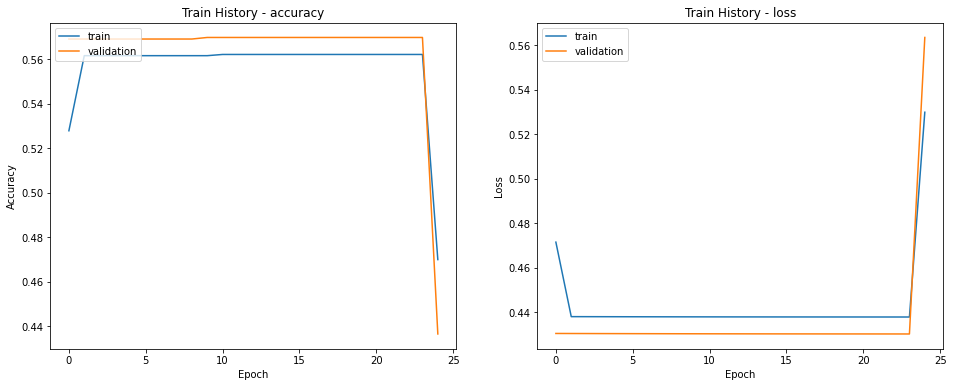

In [0]:
show_train_history(historyCNN)

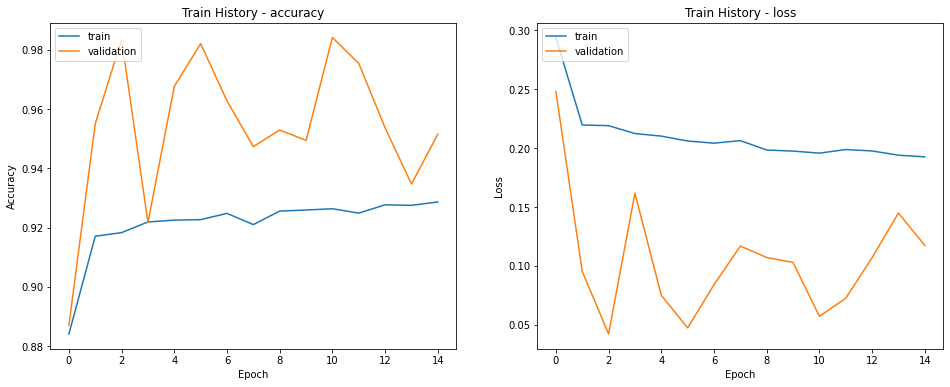

In [0]:
show_train_history(historyMLP)

#### 6. 結語

由於我們所收集的資料分佈較極端，加上資料類型的不適合，導致我們使用CNN訓練時的準確度較低，只有五成左右。因此，在經過多次不同機器學習方法的嘗試，MLP為最適合的訓練方法，和我們的資料類型最匹配，進而能達到九成的準確度。因此我們了解到，若要對音樂特徵進行分析訓練，MLP是一個很好的方式。

在建立模型的過程中，我們發現許多需要改進的地方：

1. 由於我們在抓取資料時，有資料量不足的問題，可以再進一步做資料來源的評估。

2. 分析之後發現，我們的資料量太過極端，導致輸出值指有0跟1，我們可以藉由對音樂本身多加分析，將輸出值分成更多等級，使結果更精準也更實用。

3. 目前完成的部分只有原先我們構想題目的一半，希望能進一步加上身體指數的偵測和應用

 



